In [2]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [3]:
tqdm.pandas()


In [4]:
chembl = pd.read_csv("ChEMBL/ChEMBL3397.csv", sep=";")

In [5]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL5178464,NaN,NaN,378.41,0.0,3.56,21,COc1cccc(F)c1CNc1ccc(-c2cnc(C)nc2C)c2nncn12,IC50,'>',...,CHEMBL5154826,1,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,NaN,NaN,20.000
1,CHEMBL151096,NaN,NaN,217.27,0.0,3.52,21,CCCCOc1ccc(-c2cocn2)cc1,NT,NaN,...,CHEMBL1145921,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1835784,NaN,NaN,369.51,0.0,3.53,5s,C[C@@H]1CCCN1CCCOc1ccc(C2=NN(C)C(=O)C3CCCC23)cc1,IC50,'>',...,CHEMBL1833909,1,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,30.000
3,CHEMBL1433673,NaN,NaN,NaN,NaN,NaN,SID11112480,NaN,AC50,NaN,...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL1571061,NaN,NaN,498.57,0.0,4.24,SID17384930,Cc1cc(CNC(=O)[C@@H]2C[C@H]2[C@@H](NP(=O)(c2ccc...,AC50,NaN,...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32452,CHEMBL563,FLURBIPROFEN,4.0,244.26,0.0,3.68,FP,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,Drug metabolism,NaN,...,CHEMBL5356989,1,Scientific Literature,RSC Med Chem,2023.0,NaN,DOSE_Lower = 1.0 microM | DOSE_Upper = 5.0 mic...,BINDING AGENT,NaN,NaN
32453,CHEMBL256907,NaN,NaN,513.68,2.0,5.95,1,Cc1nnc(C(C)C)n1[C@H]1C[C@H]2CC[C@@H](C1)N2CC[C...,IC50,'=',...,CHEMBL5150068,1,Scientific Literature,J Med Chem,2022.0,NaN,NaN,INHIBITOR,NaN,14.400
32454,CHEMBL376488,BEDAQUILINE,4.0,555.52,2.0,7.13,"1; TMC207,R207910",COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,IC50,'>',...,CHEMBL5113423,1,Scientific Literature,Bioorg Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,10.000
32455,CHEMBL308954,ETRAVIRINE,4.0,435.29,0.0,4.72,ETR; 1,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,IC50,'=',...,CHEMBL5331107,1,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 0.3333 hr,INHIBITOR,NaN,0.277


In [6]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [7]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range            175
Potential missing data             4
Potential transcription error      1
Name: count, dtype: int64

In [8]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR        724
SUBSTRATE          6
BINDING AGENT      4
Name: count, dtype: int64

In [9]:
chembl["Standard Units"].value_counts()

Standard Units
nM              16444
%                3316
uM                313
hr                 13
pmol/min           12
uL/min              9
nmol/min            8
min                 4
/min                3
uL/min/pmol         3
min-1               3
10'-4/min           2
mM                  2
ug.mL-1             2
/min/microM         2
/uM/min             2
ml/min/nmol         1
mL.min-1.g-1        1
Name: count, dtype: int64

In [10]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
IC50                           6845
Potency                        3082
Inhibition                     2970
Ki                             1038
Activity                        524
INH                             288
FC                              152
Drug metabolism                 128
TDI                             105
EC50                             36
Stability                        30
Ratio IC50                       19
T1/2                             13
Km                               12
Vmax                             11
CL                               10
IC90                              8
mechanism based inhibition        7
Kinact                            4
NT                                3
Activation                        3
CLH                               3
Ratio                             3
pIC50                             3
Control of P-450 marker           2
Compound recovery                 2
Partition rati

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

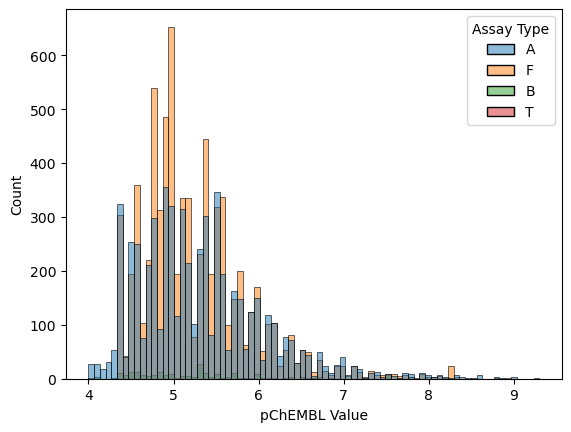

In [11]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

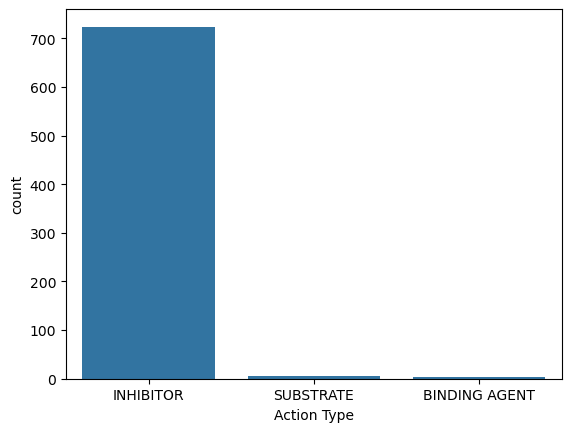

In [12]:
sns.countplot(data=chembl, x="Action Type")

In [13]:
n_mol = chembl["Molecule ChEMBL ID"].nunique()
n_mol

26243

In [14]:
n_assays = chembl["Assay ChEMBL ID"].nunique()
n_assays

2995

In [15]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [16]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [17]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32457/32457 [04:15<00:00, 127.02it/s]


In [18]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [19]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32457/32457 [00:08<00:00, 3645.52it/s]


In [20]:
substrates = chembl[chembl["Action Type"] == "SUBSTRATE"]

In [21]:
substrates.INCHIKEY.nunique()

6

In [22]:
len(substrates.INCHIKEY)

6

In [23]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "Molecule Name", "Action Type"]

In [24]:
clean_active = substrates[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")


/tmp/ipykernel_29220/1475071475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [25]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type
7455,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N,FLURBIPROFEN,SUBSTRATE
16267,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,DICLOFENAC,SUBSTRATE
18896,CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,JLRGJRBPOGGCBT-UHFFFAOYSA-N,TOLBUTAMIDE,SUBSTRATE
22928,CC(=O)C[C@@H](c1ccccc1)c1c(O)c2ccccc2oc1=O,PJVWKTKQMONHTI-HNNXBMFYSA-N,NaN,SUBSTRATE
27641,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,FLUOXETINE,SUBSTRATE


In [26]:
clean_deduped["action_type"].value_counts()

action_type
SUBSTRATE    6
Name: count, dtype: int64

In [27]:
clean_deduped["action_type"] = "substrate"

In [28]:
clean_deduped["action_type"].value_counts()

action_type
substrate    6
Name: count, dtype: int64

In [29]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

In [31]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)